In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv('data.csv')
df.drop(['Over18'], axis=1, inplace=True)
df.drop(['EmployeeCount'], axis=1, inplace=True)
df.drop(['StandardHours'], axis=1, inplace=True)

In [3]:
df.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1024.865306,2.721769,65.891156,2.729932,2.063946,2.728571,...,3.153741,2.712245,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,602.024335,1.093082,20.329428,0.711561,1.106940,1.102846,...,0.360824,1.081209,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.000000,1.000000,30.000000,1.000000,1.000000,1.000000,...,3.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,491.250000,2.000000,48.000000,2.000000,1.000000,2.000000,...,3.000000,2.000000,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1020.500000,3.000000,66.000000,3.000000,2.000000,3.000000,...,3.000000,3.000000,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1555.750000,4.000000,83.750000,3.000000,3.000000,4.000000,...,3.000000,4.000000,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,2068.000000,4.000000,100.000000,4.000000,5.000000,4.000000,...,4.000000,4.000000,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


In [4]:
categorical_list = [
    'Attrition',
    'BusinessTravel',
    'Department',
    'EducationField',
    'Gender',
    'JobRole',
    'MaritalStatus',
    'OverTime'
]

In [5]:
def get_all_possible_values(df, col):
    return df[col].unique()

In [6]:
convert_dict = {}
for column_name in categorical_list:
    convert_dict[column_name] = get_all_possible_values(df, column_name)

In [7]:
convert_dict

{'Attrition': array(['Yes', 'No'], dtype=object),
 'BusinessTravel': array(['Travel_Rarely', 'Travel_Frequently', 'Non-Travel'], dtype=object),
 'Department': array(['Sales', 'Research & Development', 'Human Resources'], dtype=object),
 'EducationField': array(['Life Sciences', 'Other', 'Medical', 'Marketing',
        'Technical Degree', 'Human Resources'], dtype=object),
 'Gender': array(['Female', 'Male'], dtype=object),
 'JobRole': array(['Sales Executive', 'Research Scientist', 'Laboratory Technician',
        'Manufacturing Director', 'Healthcare Representative', 'Manager',
        'Sales Representative', 'Research Director', 'Human Resources'],
       dtype=object),
 'MaritalStatus': array(['Single', 'Married', 'Divorced'], dtype=object),
 'OverTime': array(['Yes', 'No'], dtype=object)}

In [8]:
for col, values in convert_dict.items():
    df[col] = df[col].map({value: i for i, value in enumerate(values)})

In [9]:
# show the columns that have large std
df.std()

Age                            9.135373
Attrition                      0.367863
BusinessTravel                 0.665455
DailyRate                    403.509100
Department                     0.527792
DistanceFromHome               8.106864
Education                      1.024165
EducationField                 1.431780
EmployeeNumber               602.024335
EnvironmentSatisfaction        1.093082
Gender                         0.490065
HourlyRate                    20.329428
JobInvolvement                 0.711561
JobLevel                       1.106940
JobRole                        2.323902
JobSatisfaction                1.102846
MaritalStatus                  0.730121
MonthlyIncome               4707.956783
MonthlyRate                 7117.786044
NumCompaniesWorked             2.498009
OverTime                       0.450606
PercentSalaryHike              3.659938
PerformanceRating              0.360824
RelationshipSatisfaction       1.081209
StockOptionLevel               0.852077


In [10]:
Y = df['Education']
X = df.drop(['Education'], axis=1)

In [11]:
# normalize all columns
for col in X.columns:
    X[col] = (X[col] - X[col].mean()) / X[col].std()


In [12]:
from sklearn.model_selection import KFold

# 设置K值，这里是10
kfold = KFold(n_splits=10, shuffle=True, random_state=42)

# 创建空列表存放子集
X_subsets = []
Y_subsets = []

# 将数据按照交叉验证拆分
for train_index, test_index in kfold.split(X):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    Y_train, Y_test = Y.iloc[train_index], Y.iloc[test_index]

    X_subsets.append((X_train, X_test))
    Y_subsets.append((Y_train, Y_test))


In [14]:
from sklearn.model_selection import KFold
from sklearn.svm import SVC
import numpy as np
import pandas as pd

# 创建K折交叉验证
kfold = KFold(n_splits=10, shuffle=True, random_state=42)

# 初始化模型
clf = SVC(kernel='linear')

# 存储准确度
accuracies = []

# 遍历每个折叠
for train_index, test_index in kfold.split(X):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    Y_train, Y_test = Y.iloc[train_index], Y.iloc[test_index]

    # 训练模型
    clf.fit(X_train, Y_train)

    # 评估模型并存储准确度
    accuracy = clf.score(X_test, Y_test)
    accuracies.append(accuracy)
    print(f"Accuracy for this fold: {accuracy}")

# 输出平均准确度
print(f"Average Accuracy: {np.mean(accuracies)}")



Accuracy for this fold: 0.3129251700680272
Accuracy for this fold: 0.43537414965986393
Accuracy for this fold: 0.46258503401360546
Accuracy for this fold: 0.36054421768707484
Accuracy for this fold: 0.3401360544217687
Accuracy for this fold: 0.3741496598639456
Accuracy for this fold: 0.4013605442176871
Accuracy for this fold: 0.3469387755102041
Accuracy for this fold: 0.35374149659863946
Accuracy for this fold: 0.40816326530612246
Average Accuracy: 0.3795918367346939


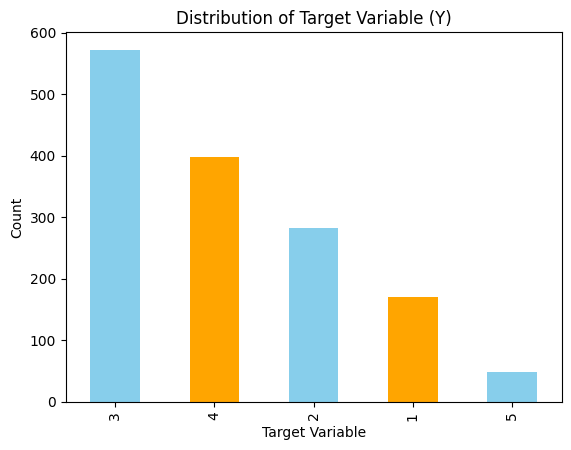

In [15]:
import matplotlib.pyplot as plt

# 查看目标变量的分布
Y.value_counts().plot(kind='bar', color=['skyblue', 'orange'])
plt.title('Distribution of Target Variable (Y)')
plt.xlabel('Target Variable')
plt.ylabel('Count')
plt.show()
